# Data Cleaning

In [8]:
!pip install pandas

In [9]:
import pandas as pd


In [10]:

df = pd.read_csv("TMDB1123.csv", on_bad_lines='skip', engine='python')
print(df.head(10))
#The original file can be downloaded through https://www.kaggle.com/datasets/akshaypawar7/millions-of-movies
# But the file in this project refers to https://drive.google.com/file/d/1QnTVkSB7Q4JpP119GaPt4z20IvCDcUI0/view?usp=drive_link

       id                              title  \
0  615656                  Meg 2: The Trench   
1  758323                The Pope's Exorcist   
2  533535               Deadpool & Wolverine   
3  667538   Transformers: Rise of the Beasts   
4  693134                     Dune: Part Two   
5  912649              Venom: The Last Dance   
6  640146  Ant-Man and the Wasp: Quantumania   
7  677179                          Creed III   
8  614479            Insidious: The Red Door   
9  519182                    Despicable Me 4   

                             genres original_language  \
0     Action-Science Fiction-Horror                en   
1           Horror-Mystery-Thriller                en   
2     Action-Comedy-Science Fiction                en   
3  Action-Adventure-Science Fiction                en   
4         Science Fiction-Adventure                en   
5  Science Fiction-Action-Adventure                en   
6  Action-Adventure-Science Fiction                en   
7              

In [11]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [12]:
# Convert 'release_date' to datetime, handling errors
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract year, month, and day, filling NaNs with -1
df['year'] = df['release_date'].dt.year.fillna(-1).astype(int)
df['month'] = df['release_date'].dt.month.fillna(-1).astype(int)
df['day'] = df['release_date'].dt.day.fillna(-1).astype(int)

In [13]:
print(df.shape)

(722317, 23)


In [14]:
count = (df['budget'] == 0).sum()

print(f"There are {count} movie's budget  0")

There are 685547 movie's budget  0


In [15]:
# 将 budget 列转换为数值类型
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

# 再次过滤 budget 不为 0 的行
df_drop = df[df['budget'] != 0].copy()
# 检查结果
print(df_drop.head())


       id                             title                            genres  \
0  615656                 Meg 2: The Trench     Action-Science Fiction-Horror   
1  758323               The Pope's Exorcist           Horror-Mystery-Thriller   
2  533535              Deadpool & Wolverine     Action-Comedy-Science Fiction   
3  667538  Transformers: Rise of the Beasts  Action-Adventure-Science Fiction   
4  693134                    Dune: Part Two         Science Fiction-Adventure   

  original_language                                           overview  \
0                en  An exploratory dive into the deepest depths of...   
1                en  Father Gabriele Amorth Chief Exorcist of the V...   
2                en  A listless Wade Wilson toils away in civilian ...   
3                en  When a new threat capable of destroying the en...   
4                en  Follow the mythic journey of Paul Atreides as ...   

   popularity                               production_companies rel

In [16]:
print(df_drop.shape)

(36770, 23)


In [ ]:
df_drop['revenue'] = df_drop['revenue'].astype(int)

In [19]:
exists = ((df_drop['status'] == 'released') & (df_drop['revenue'] == 0)).any()

if exists:
    print(" `status` is 'released' and `revenue` is 0 ")
else:
    print("No `status` is 'released' and `revenue` is  0 ")


No `status` is 'released' and `revenue` is  0 


In [20]:
df_drop['Genres_Split'] = df_drop['genres'].str.split(', ')

print(df_drop.head())

       id                             title                            genres  \
0  615656                 Meg 2: The Trench     Action-Science Fiction-Horror   
1  758323               The Pope's Exorcist           Horror-Mystery-Thriller   
2  533535              Deadpool & Wolverine     Action-Comedy-Science Fiction   
3  667538  Transformers: Rise of the Beasts  Action-Adventure-Science Fiction   
4  693134                    Dune: Part Two         Science Fiction-Adventure   

  original_language                                           overview  \
0                en  An exploratory dive into the deepest depths of...   
1                en  Father Gabriele Amorth Chief Exorcist of the V...   
2                en  A listless Wade Wilson toils away in civilian ...   
3                en  When a new threat capable of destroying the en...   
4                en  Follow the mythic journey of Paul Atreides as ...   

   popularity                               production_companies rel

In [21]:
print(df_drop.shape)

(36770, 24)


In [22]:
print(df_drop.isnull().sum())

id                          0
title                       0
genres                   3417
original_language           0
overview                 1864
popularity                  0
production_companies    10464
release_date             2680
budget                      0
revenue                     0
runtime                   433
status                      0
tagline                 17005
vote_average                0
vote_count                  0
credits                  3074
keywords                14299
poster_path              4066
backdrop_path           15489
recommendations         26856
year                        0
month                       0
day                         0
Genres_Split             3417
dtype: int64


In [23]:
print(df_drop.head())

       id                             title                            genres  \
0  615656                 Meg 2: The Trench     Action-Science Fiction-Horror   
1  758323               The Pope's Exorcist           Horror-Mystery-Thriller   
2  533535              Deadpool & Wolverine     Action-Comedy-Science Fiction   
3  667538  Transformers: Rise of the Beasts  Action-Adventure-Science Fiction   
4  693134                    Dune: Part Two         Science Fiction-Adventure   

  original_language                                           overview  \
0                en  An exploratory dive into the deepest depths of...   
1                en  Father Gabriele Amorth Chief Exorcist of the V...   
2                en  A listless Wade Wilson toils away in civilian ...   
3                en  When a new threat capable of destroying the en...   
4                en  Follow the mythic journey of Paul Atreides as ...   

   popularity                               production_companies rel

In [24]:
df_drop.loc[:,'production_companies'] = df_drop['production_companies'].fillna('Not Known')
df_drop.loc[:,'keywords'] = df_drop['keywords'].fillna('Not Known')
df_drop.loc[:,'credits'] = df_drop['overview'].fillna('Not Known')
df_drop.loc[:,'tagline'] = df_drop['tagline'].fillna('Not Known')
df_drop.loc[:,'overview'] = df_drop['overview'].fillna('Not Known')

In [25]:
print(df_drop.isnull().sum())

id                          0
title                       0
genres                   3417
original_language           0
overview                    0
popularity                  0
production_companies        0
release_date             2680
budget                      0
revenue                     0
runtime                   433
status                      0
tagline                     0
vote_average                0
vote_count                  0
credits                     0
keywords                    0
poster_path              4066
backdrop_path           15489
recommendations         26856
year                        0
month                       0
day                         0
Genres_Split             3417
dtype: int64


In [26]:
print(df_drop.sort_values(by='runtime', ascending=True))

            id                                           title  \
722273  741091                            The Formula Of Water   
404165  394012  Die fremde Frau - Winterreise nach Flossenbürg   
404282  399354                                   Sangue Sparso   
404424  179697                      Kiss [1979] The Kiss Reels   
405129  453439                                      In Between   
...        ...                                             ...   
671221  316755                         VACANZE IN SICILIA 2012   
671431  370859                              Life Passion Death   
671496  339662                                 Shadows & Forms   
677368  357989                 Europa Konzert From Madrid 2011   
677499  316285                                          Cicada   

                           genres original_language  \
722273  Science Fiction-Adventure                ru   
404165                Documentary                de   
404282                      Drama         

In [27]:
df_cleaned = df_drop.dropna(subset=['Genres_Split'])

In [28]:
print(df_cleaned.isnull().sum())

id                          0
title                       0
genres                      0
original_language           0
overview                    0
popularity                  0
production_companies        0
release_date             1314
budget                      0
revenue                     0
runtime                   328
status                      0
tagline                     0
vote_average                0
vote_count                  0
credits                     0
keywords                    0
poster_path              2725
backdrop_path           12470
recommendations         23443
year                        0
month                       0
day                         0
Genres_Split                0
dtype: int64


In [29]:
print(df_cleaned.shape)

(33353, 24)


In [30]:
print(df_cleaned.head())

       id                             title                            genres  \
0  615656                 Meg 2: The Trench     Action-Science Fiction-Horror   
1  758323               The Pope's Exorcist           Horror-Mystery-Thriller   
2  533535              Deadpool & Wolverine     Action-Comedy-Science Fiction   
3  667538  Transformers: Rise of the Beasts  Action-Adventure-Science Fiction   
4  693134                    Dune: Part Two         Science Fiction-Adventure   

  original_language                                           overview  \
0                en  An exploratory dive into the deepest depths of...   
1                en  Father Gabriele Amorth Chief Exorcist of the V...   
2                en  A listless Wade Wilson toils away in civilian ...   
3                en  When a new threat capable of destroying the en...   
4                en  Follow the mythic journey of Paul Atreides as ...   

   popularity                               production_companies rel

In [31]:
df_final = df_cleaned.dropna(subset=['release_date','runtime'])

In [32]:
df_finalized= df_final.drop(columns=['backdrop_path','recommendations','poster_path'])

In [33]:
print(df_finalized.isnull().sum())

id                      0
title                   0
genres                  0
original_language       0
overview                0
popularity              0
production_companies    0
release_date            0
budget                  0
revenue                 0
runtime                 0
status                  0
tagline                 0
vote_average            0
vote_count              0
credits                 0
keywords                0
year                    0
month                   0
day                     0
Genres_Split            0
dtype: int64


In [34]:
print(df_finalized.shape)

(31770, 21)


##Cluster Genre

In [35]:
print(df_finalized['Genres_Split'].head())


0       [Action-Science Fiction-Horror]
1             [Horror-Mystery-Thriller]
2       [Action-Comedy-Science Fiction]
3    [Action-Adventure-Science Fiction]
4           [Science Fiction-Adventure]
Name: Genres_Split, dtype: object


In [37]:
df_finalized['Genres_Split'] = df_finalized['genres'].astype(str).apply(lambda x: x.split('-'))

genres_encoded = df_finalized['Genres_Split'].str.join('|').str.get_dummies(sep='|')

df_finalized = pd.concat([df_finalized, genres_encoded], axis=1)

print(df_finalized.head())

       id                             title                            genres  \
0  615656                 Meg 2: The Trench     Action-Science Fiction-Horror   
1  758323               The Pope's Exorcist           Horror-Mystery-Thriller   
2  533535              Deadpool & Wolverine     Action-Comedy-Science Fiction   
3  667538  Transformers: Rise of the Beasts  Action-Adventure-Science Fiction   
4  693134                    Dune: Part Two         Science Fiction-Adventure   

  original_language                                           overview  \
0                en  An exploratory dive into the deepest depths of...   
1                en  Father Gabriele Amorth Chief Exorcist of the V...   
2                en  A listless Wade Wilson toils away in civilian ...   
3                en  When a new threat capable of destroying the en...   
4                en  Follow the mythic journey of Paul Atreides as ...   

   popularity                               production_companies rel

In [38]:
print(df_finalized.isnull().sum())

id                      0
title                   0
genres                  0
original_language       0
overview                0
popularity              0
production_companies    0
release_date            0
budget                  0
revenue                 0
runtime                 0
status                  0
tagline                 0
vote_average            0
vote_count              0
credits                 0
keywords                0
year                    0
month                   0
day                     0
Genres_Split            0
Action                  0
Adventure               0
Animation               0
Comedy                  0
Crime                   0
Documentary             0
Drama                   0
Family                  0
Fantasy                 0
History                 0
Horror                  0
Music                   0
Mystery                 0
Romance                 0
Science Fiction         0
TV Movie                0
Thriller                0
War         

In [39]:
df_finalized = df_finalized.drop(columns=['Genres_Split'])

In [40]:
print(df_finalized.head(-10))

            id                             title  \
0       615656                 Meg 2: The Trench   
1       758323               The Pope's Exorcist   
2       533535              Deadpool & Wolverine   
3       667538  Transformers: Rise of the Beasts   
4       693134                    Dune: Part Two   
...        ...                               ...   
722030  712132                 One of These Days   
722078  456526                            Aglien   
722085  422755           Random Acts of Violence   
722112  407739      Spring Break Zombie Massacre   
722128  397861   Paradise Lost: Over the Madness   

                                         genres original_language  \
0                 Action-Science Fiction-Horror                en   
1                       Horror-Mystery-Thriller                en   
2                 Action-Comedy-Science Fiction                en   
3              Action-Adventure-Science Fiction                en   
4                     Science 

##Delete unresonable datas

In [41]:
condition = (df_finalized['status'] == 'Released') & (df_finalized['release_date'] > pd.Timestamp('2024-11-23'))


In [42]:
deleted_data = df_finalized[condition]
print("Deleted data：")
print(deleted_data)

Deleted data：
           id                 title         genres original_language  \
41345  861211  In the Name of Blood       Thriller                fr   
72899  563470           Never Alone  Drama-History                fi   

                                                overview  popularity  \
41345  In the working-class neighborhoods of Nice a p...       4.515   
72899  1942. The State of Finland has formed an allia...       2.648   

                                    production_companies release_date  \
41345  Adastra Films-Gemini-Beside Productions-Ellly ...   2024-11-27   
72899             MRP Matila Röhr Productions-Taska Film   2025-01-17   

          budget  revenue  ...  History Horror Music  Mystery  Romance  \
41345  3600000.0      0.0  ...        0      0     0        0        0   
72899  4900000.0      0.0  ...        1      0     0        0        0   

      Science Fiction TV Movie  Thriller  War  Western  
41345               0        0         1    0       

In [43]:
df_finalized = df_finalized[~condition]

print(df_finalized.head())

       id                             title                            genres  \
0  615656                 Meg 2: The Trench     Action-Science Fiction-Horror   
1  758323               The Pope's Exorcist           Horror-Mystery-Thriller   
2  533535              Deadpool & Wolverine     Action-Comedy-Science Fiction   
3  667538  Transformers: Rise of the Beasts  Action-Adventure-Science Fiction   
4  693134                    Dune: Part Two         Science Fiction-Adventure   

  original_language                                           overview  \
0                en  An exploratory dive into the deepest depths of...   
1                en  Father Gabriele Amorth Chief Exorcist of the V...   
2                en  A listless Wade Wilson toils away in civilian ...   
3                en  When a new threat capable of destroying the en...   
4                en  Follow the mythic journey of Paul Atreides as ...   

   popularity                               production_companies rel

In [44]:
print(df_finalized.shape)

(31768, 58)


In [45]:
condition1 = ~((df_finalized['status'] == 'released') & (df_finalized['revenue'] == 0))  # Assign the boolean condition
deleted_data1 = df_finalized[condition1]  # Use the boolean condition for filtering
print("Finailzed", df_finalized[condition1].head)  # Also correct this line to use the filtered DataFrame

Finailzed <bound method NDFrame.head of             id                             title  \
0       615656                 Meg 2: The Trench   
1       758323               The Pope's Exorcist   
2       533535              Deadpool & Wolverine   
3       667538  Transformers: Rise of the Beasts   
4       693134                    Dune: Part Two   
...        ...                               ...   
722222  915513                    I'm relafucked   
722237  895769                      Dis/Informed   
722239  814066                       Rondò final   
722245  686322                              buna   
722273  741091              The Formula Of Water   

                                  genres original_language  \
0          Action-Science Fiction-Horror                en   
1                Horror-Mystery-Thriller                en   
2          Action-Comedy-Science Fiction                en   
3       Action-Adventure-Science Fiction                en   
4              Science Fi

In [46]:
# plotting the year of the films release
plt.figure(figsize=(12, 6))
plt.hist(df_finalized['release_date'].dt.year, bins=99, color='gold', alpha=1, edgecolor='white')
plt.xlim(1960, 2024)
plt.xlabel("Year")
plt.ylabel("Number of Films")
plt.title("Year of Release Date by Number of Films")
plt.show()

NameError: name 'plt' is not defined

In [47]:
company_counts = df_finalized['production_companies'].str.split(', ').explode()

company_counts = company_counts.value_counts()

print(company_counts.head(30))

production_companies
Not Known                                 6771
Metro-Goldwyn-Mayer                        173
Paramount                                  120
Warner Bros. Pictures                      118
20th Century Fox                           106
Universal Pictures                          93
Columbia Pictures                           71
Walt Disney Productions                     55
RKO Radio Pictures                          50
New Line Cinema                             43
The Asylum                                  37
Queens Of Combat                            36
ONF | NFB                                   32
Rapid Heart Pictures                        31
TriStar Pictures                            27
Yash Raj Films                              26
Republic Pictures                           26
Maverick Entertainment Group                24
Orion Pictures                              24
Touchstone Pictures                         24
Marvel Studios                         

In [48]:
company_counts = df_finalized['production_companies'].str.split(', ').explode()
company_counts = company_counts.value_counts()
print(company_counts.head(50)[30:60])

production_companies
DreamWorks Animation                                  16
Miramax                                               15
Imagine Entertainment-Universal Pictures              15
Geminus Studios                                       15
Women's Superstars United (WSU)                       14
Iranian Independents                                  14
Malpaso Productions-Warner Bros. Pictures             13
Brain Damage Films                                    13
Biola University                                      13
Scorpio Film Releasing                                13
Central Partnership                                   13
Triangle Films                                        13
Pixar-Walt Disney Pictures                            12
Gravitas Ventures                                     12
Lions Gate Films                                      12
CT ROAD Entertainment                                 12
New World Pictures                                    12
Piercing P

In [49]:
top_companies = [
    "Metro-Goldwyn-Mayer",
    "Paramount",
    "Warner Bros. Pictures",
    "20th Century Fox",
    "Universal Pictures",
    "Columbia Pictures",
    "Walt Disney Productions"
]

for company in top_companies:
    df_finalized[f'{company}'] = df_finalized['production_companies'].apply(
        lambda x: 1 if isinstance(x, str) and company in x else 0
    )

In [50]:
print(df_finalized.head())

       id                             title                            genres  \
0  615656                 Meg 2: The Trench     Action-Science Fiction-Horror   
1  758323               The Pope's Exorcist           Horror-Mystery-Thriller   
2  533535              Deadpool & Wolverine     Action-Comedy-Science Fiction   
3  667538  Transformers: Rise of the Beasts  Action-Adventure-Science Fiction   
4  693134                    Dune: Part Two         Science Fiction-Adventure   

  original_language                                           overview  \
0                en  An exploratory dive into the deepest depths of...   
1                en  Father Gabriele Amorth Chief Exorcist of the V...   
2                en  A listless Wade Wilson toils away in civilian ...   
3                en  When a new threat capable of destroying the en...   
4                en  Follow the mythic journey of Paul Atreides as ...   

   popularity                               production_companies rel

In [51]:
from google.colab import files

df_finalized.to_csv('movie_final_dataset.csv', index=False)


files.download('movie_final_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Abnormal Value

In [54]:

df_filtered = df_finalized[~((df['status'] == 'released') & (df['revenue'] == 0))]

print("筛选后数据行数：", df_filtered.shape[0])


筛选后数据行数： 31768


<ipython-input-54-9e292d14e9bd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_finalized[~((df['status'] == 'released') & (df['revenue'] == 0))]


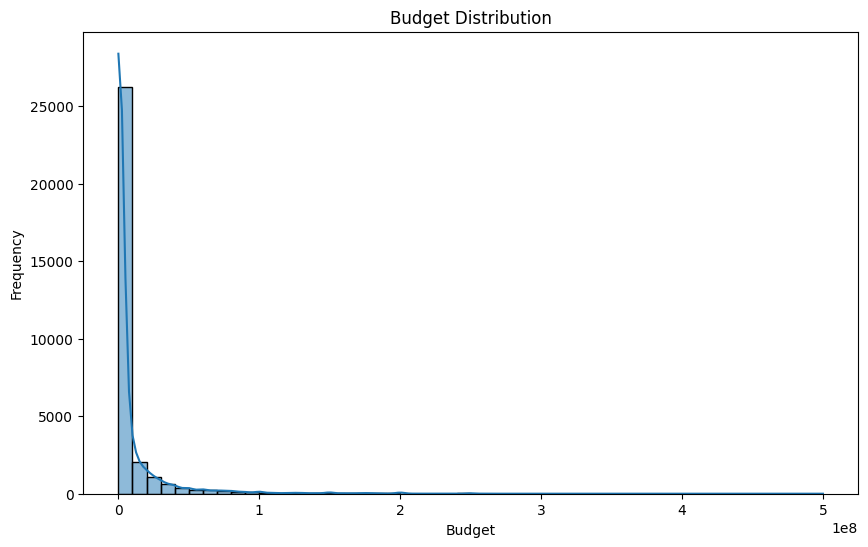

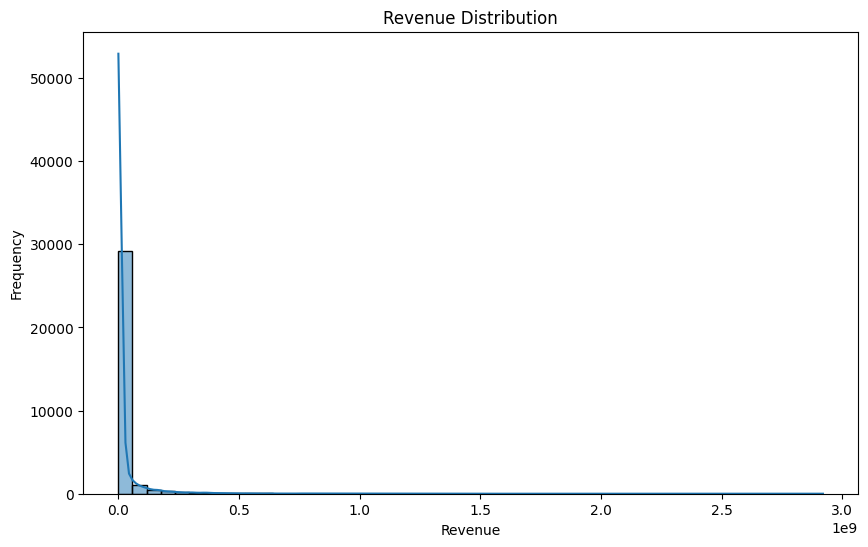

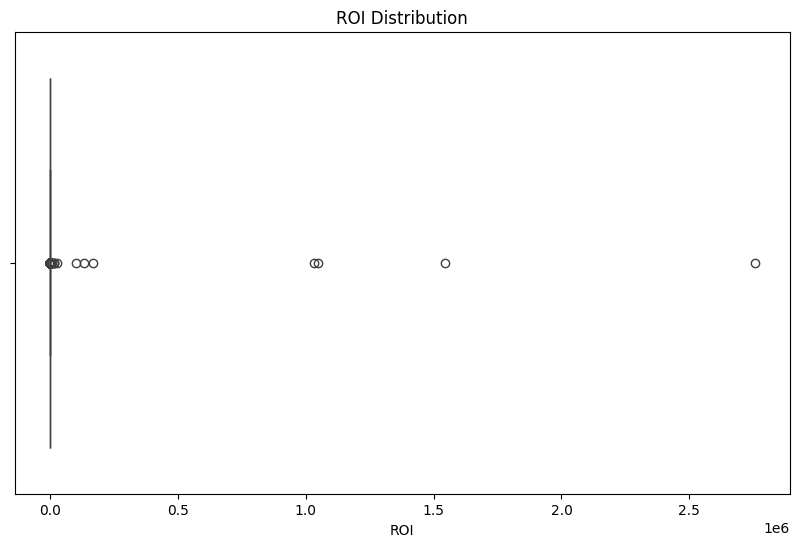

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_finalized['budget'], bins=50, kde=True)
plt.title('Budget Distribution')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_finalized['revenue'], bins=50, kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

df['ROI'] = (df_finalized['revenue'] - df['budget']) / df['budget']
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ROI'])
plt.title('ROI Distribution')
plt.xlabel('ROI')
plt.show()


In [56]:
print(df_finalized[(df_finalized['status'] == 'Released') & (df_finalized['revenue'] == 0)].shape)


(21092, 65)


In [57]:
df_final1 = df_finalized[~((df_finalized['status'] == 'Released') & (df_finalized['revenue'] == 0))]
df_final1 = df_final1[~(df_final1['budget'] < 50000)]

In [58]:
print(df_final1.shape)

(9386, 65)


In [59]:
print(df_final1[df_final1['budget'] < 50000])

Empty DataFrame
Columns: [id, title, genres, original_language, overview, popularity, production_companies, release_date, budget, revenue, runtime, status, tagline, vote_average, vote_count, credits, keywords, year, month, day, Action, Adventure, Animation, Comedy, Crime, Documentary, Drama, Family, Fantasy, History, Horror, Music, Mystery, Romance, Science Fiction, TV Movie, Thriller, War, Western, Action, Adventure, Animation, Comedy, Crime, Documentary, Drama, Family, Fantasy, History, Horror, Music, Mystery, Romance, Science Fiction, TV Movie, Thriller, War, Western, Metro-Goldwyn-Mayer, Paramount, Warner Bros. Pictures, 20th Century Fox, Universal Pictures, Columbia Pictures, Walt Disney Productions]
Index: []

[0 rows x 65 columns]


##Encode Genre


In [60]:
df_final1['first_genre'] = df_final1['genres'].apply(
    lambda x: x.split('-')[0] if isinstance(x, str) and '-' in x else x
)

print(df_final1[['genres', 'first_genre']].head())


                             genres      first_genre
0     Action-Science Fiction-Horror           Action
1           Horror-Mystery-Thriller           Horror
2     Action-Comedy-Science Fiction           Action
3  Action-Adventure-Science Fiction           Action
4         Science Fiction-Adventure  Science Fiction


In [61]:
print(df_final1.head())

       id                             title                            genres  \
0  615656                 Meg 2: The Trench     Action-Science Fiction-Horror   
1  758323               The Pope's Exorcist           Horror-Mystery-Thriller   
2  533535              Deadpool & Wolverine     Action-Comedy-Science Fiction   
3  667538  Transformers: Rise of the Beasts  Action-Adventure-Science Fiction   
4  693134                    Dune: Part Two         Science Fiction-Adventure   

  original_language                                           overview  \
0                en  An exploratory dive into the deepest depths of...   
1                en  Father Gabriele Amorth Chief Exorcist of the V...   
2                en  A listless Wade Wilson toils away in civilian ...   
3                en  When a new threat capable of destroying the en...   
4                en  Follow the mythic journey of Paul Atreides as ...   

   popularity                               production_companies rel

In [62]:
from google.colab import files

df_final1.to_csv('movie_final_dataset1.csv', index=False)

files.download('movie_final_dataset1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>